In [193]:
import zipfile
import pandas as pd

In [194]:
with zipfile.ZipFile('data.zip') as zip_ref:
  zip_ref.extractall()

# Data_2d

In [195]:
df = pd.read_csv("data/data_2d.csv", header=None)

df.head()

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


## Elbow method

In [196]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [197]:
distortions = []
n_clusters = range(1, 11)
for i in n_clusters:
  kmeans = KMeans(n_clusters=i, max_iter=300, n_init='auto', random_state=0)
  kmeans.fit(df)
  distortions.append(kmeans.inertia_)

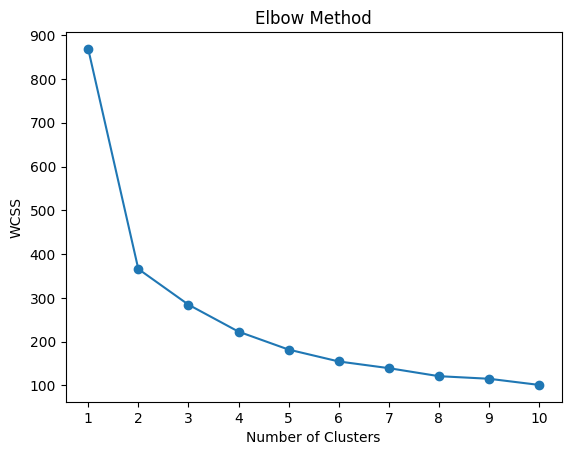

In [198]:
plt.plot(n_clusters, distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(n_clusters)

plt.show()

The plot shows that optimal k is 2

## Create clasters

In [199]:
optimal_k = 2

In [200]:
def kmeans_clasterization(df):
  kmeans = KMeans(n_clusters=optimal_k, max_iter=300, n_init='auto', random_state=0)
  cluster_labels = kmeans.fit_predict(df)
  df['claster'] = cluster_labels
  return df

df = kmeans_clasterization(df)

## Visualization

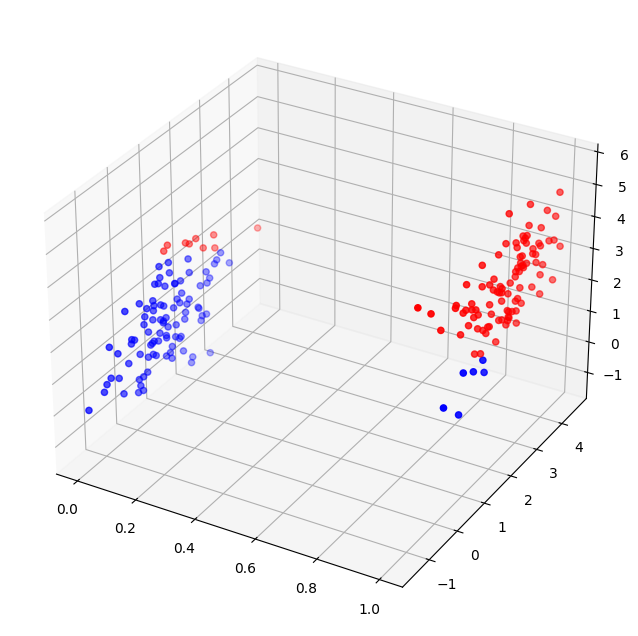

In [201]:
def show_plot():
  claster_0 = df[~(df['claster'] == 0)]
  claster_1 = df[~(df['claster'] == 1)]

  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')

  ax.scatter(claster_0[0], claster_0[1], claster_0[2], c='b', marker='o', label='0')
  ax.scatter(claster_1[0], claster_1[1], claster_1[2], c='r', marker='o', label='1')

  plt.show()

show_plot()

The clusters was formed not in the best way. One of solution of this problem is to do data normalization. I'll choose MinMaxScaler

## Normalize data

In [202]:
from sklearn.preprocessing import MinMaxScaler

In [203]:
df.drop('claster', axis=1, inplace=True)
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df))

In [204]:
df = kmeans_clasterization(df)

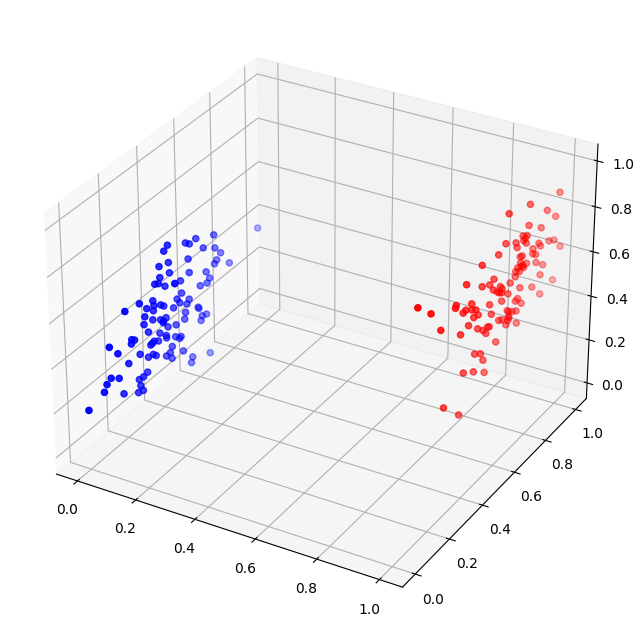

In [205]:
show_plot()

Now it looks better.